# **Date:16/01/2025**

---
**Things to do:**

* Find a system with multiple planets and that has mainly TESS data   
* Learn how to use the python package LightKurve abnd how to use it

*   Find a multiplanet system with TESS data that we can use to prove that there is infact a transiting object that we can present.
*   


---
**Work Done**
*   We found our motivation for our project: to see if there are any multiplanet systems like our own and compare the planets in it and how similar it is to our solar system. This could help us understand how our solar system is formed
*   After reading the paper on the TRAPPIST-1 system, it is quite similar to our solar system in terms of amount of planets.

*   A possible multiplanet system is TOI-125. It has 3 known planets that are confirmed and are similar to neptune and 2 possible planets not confirmed. Elizabeth and Abi are doing this one.
*  Another is L98-59(TOI-175) where there's 3 planets and 1 is in the habitable zone. Myself and Jasmin are looking at this one. It also has a TIC code that we can look up on the ExoFop database- TIC 307210830
---
**Paper and Resources:**


*   https://lightkurve.github.io/lightkurve/tutorials/1-getting-started/searching-for-data-products.html
*   https://github.com/spacetelescope/tessworkshop_tutorials/blob/master/lightkurve/workshop/Workshop.ipynb (TESS workshop)


*   https://exofop.ipac.caltech.edu/tess/view_toi.php (database with TESS data)
*    https://arxiv.org/abs/1903.08017 (Helpful paper on TOI-175)


*   https://www.ipac.caltech.edu/dois/exoplanet-archive
*   https://exofop.ipac.caltech.edu/tess/target.php?id=307210830 (TIC archive for TOI-175)




---
**Reflection of Progress so far:**

We made good progress of finding some good multiplanet systems and understanding the LightKurve package, which is important when we are taking TESS data to find that there is a transiting object.(LightKurve package tutorials listen on **Paper and Resources**)

LightKurve progress is going well, a lot of it will be used

---
**Description of Problems:**

Since we are using TESS data and it only takes data in sectors of 27 days, if a planet has a period of longer than 27 days TESS won't catch it in the data.




---
**What to do next:**


*   Finish up learning and understanding the LightKurve package.
*   Find TESS data on TIO-175 and use the LightKurve package to start modelling our graphs ready for analysis and our presentation in week 5.







In [ ]:
!pip install lightkurve
#installing lightkurve package

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.4/270.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 51.3 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=e8d19222b65675628f9cd676f1be6926afae00527b803c25023964091a4b054e
  Stored in directory: /root/.cache/pip/wheels/71/ae/f7/5b7e1e16a133d094431428169e9a8d9f750afe5

# **My attempt with TOI-175**

`period` contains 212329 points.Periodogram is likely to be large, and slow to evaluate. Consider setting `frequency_factor` to a higher value.


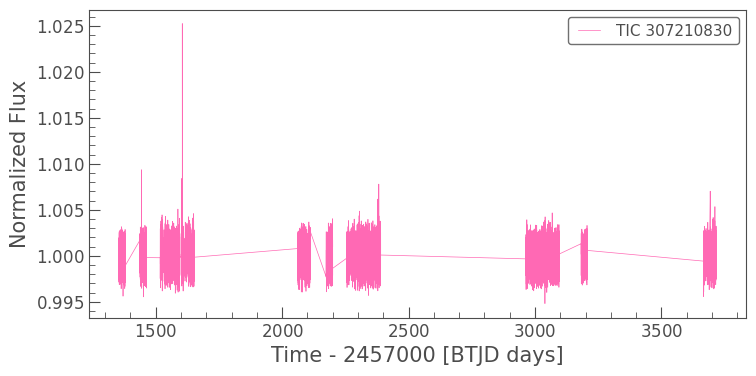

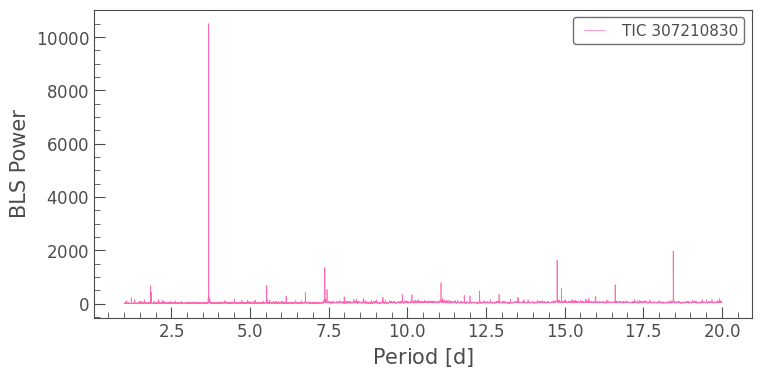

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

#this was to download all TESS data with exposure time of 120 and with an author of SPOC
search_result = lk.search_lightcurve('TIC 307210830',exptime = 120, author = 'SPOC')
lc_collection = search_result.download_all(quality_bitmask='hardest')
lcu = lc_collection.stitch().remove_nans()
search_result
lcu.scatter(color = 'hotpink')
plt.savefig('TESS_data.png')

#next we created our own period to implement Box Least Squares or bls onto our TESS data to find a transiting object.
import numpy as np

period = np.linspace(1, 20, 10000)
bls = lcu.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot(color = 'hotpink');
plt.savefig('Transit_signal.png')

3.69066906690669 d
1356.2024113410246


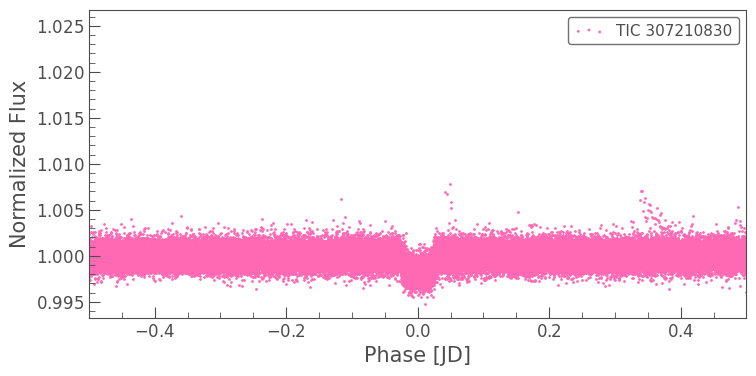

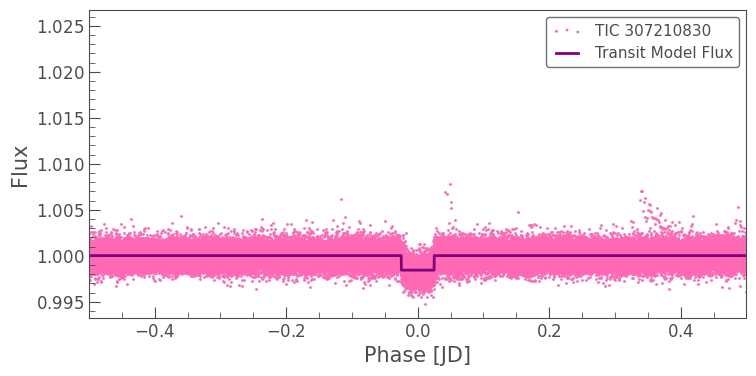

In [ ]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

#we have a strong peak at around 3 days, we can use the bls method to find the period of a planet at max power. We are going to name this transiting planet, planet b.

planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power
print(planet_b_period)
print(planet_b_t0)

#to confirm this period corresponds to the signal, we can phase-fold the light curve.
ax = lcu.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter(color= 'hotpink')
ax.set_xlim(-0.5, 0.5);

planet_b_model = bls.get_transit_model(period=planet_b_period,transit_time=planet_b_t0,duration=planet_b_dur)
ax = lcu.fold(planet_b_period, planet_b_t0).scatter(color = 'hotpink')
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='purple', lw=2)
ax.set_xlim(-0.5, 0.5);
plt.savefig('Planet_B_Transit.png')

